In [8]:
import pandas as pd

In [9]:
# data import
cardio_train_df = pd.read_csv('../Resources/Merged.csv')
cardio_train_df.head()

,id,age,gender,height,weight,BMI,ap_hi,ap_lo,cholesterol,glucose,smoke,alco,active,cardio
0,0,50.0,0,5.51,136.7,23.0,110.0,80.0,0.0,0.0,0,0,1,0
1,1,55.0,1,5.12,187.4,46.0,140.0,90.0,2.0,0.0,0,0,1,1
2,2,52.0,1,5.41,141.1,25.0,130.0,70.0,2.0,0.0,0,0,0,1
3,3,48.0,0,5.54,180.8,40.0,0.0,0.0,0.0,0.0,0,0,1,1
4,4,48.0,1,5.12,123.5,20.0,100.0,60.0,0.0,0.0,0,0,0,0


In [10]:
# clean data, drop id

clean_df = cardio_train_df.drop(['id'], 1)
clean_df

,age,gender,height,weight,BMI,ap_hi,ap_lo,cholesterol,glucose,smoke,alco,active,cardio
0,50.0,0,5.51,136.7,23.0,110.0,80.0,0.0,0.0,0,0,1,0
1,55.0,1,5.12,187.4,46.0,140.0,90.0,2.0,0.0,0,0,1,1
2,52.0,1,5.41,141.1,25.0,130.0,70.0,2.0,0.0,0,0,0,1
3,48.0,0,5.54,180.8,40.0,0.0,0.0,0.0,0.0,0,0,1,1
4,48.0,1,5.12,123.5,20.0,100.0,60.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0,0.00,0.0,0.0,110.0,70.0,1.0,0.0,0,0,1,1
69996,0.0,0,0.00,0.0,0.0,125.0,67.0,0.0,0.0,0,0,0,0
69997,0.0,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
69998,0.0,0,0.00,0.0,0.0,90.0,60.0,0.0,0.0,0,0,1,0


In [11]:
# clean data, convert age

clean_df['age'] = (clean_df['age']/365).round(1)
clean_df

,age,gender,height,weight,BMI,ap_hi,ap_lo,cholesterol,glucose,smoke,alco,active,cardio
0,0.1,0,5.51,136.7,23.0,110.0,80.0,0.0,0.0,0,0,1,0
1,0.2,1,5.12,187.4,46.0,140.0,90.0,2.0,0.0,0,0,1,1
2,0.1,1,5.41,141.1,25.0,130.0,70.0,2.0,0.0,0,0,0,1
3,0.1,0,5.54,180.8,40.0,0.0,0.0,0.0,0.0,0,0,1,1
4,0.1,1,5.12,123.5,20.0,100.0,60.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0,0.00,0.0,0.0,110.0,70.0,1.0,0.0,0,0,1,1
69996,0.0,0,0.00,0.0,0.0,125.0,67.0,0.0,0.0,0,0,0,0
69997,0.0,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
69998,0.0,0,0.00,0.0,0.0,90.0,60.0,0.0,0.0,0,0,1,0


In [12]:
# feature data for X:
# age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active
X = clean_df.drop(['cardio'], 1).values

In [13]:
# feature data for y:
# "does a person have a cardiovascular disease y/n"
y = clean_df['cardio']

In [14]:
# split data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
# logistic regression model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [16]:
# train model using data

classifier.fit(X_train, y_train)

C:\Users\Craig\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [17]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6457904761904761
Testing Data Score: 0.6474285714285715


In [18]:
# predictions

predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
6670,1,0
49567,0,0
50796,1,0
22310,1,1
54037,0,0
...,...,...
32138,1,1
53648,1,1
64554,0,0
33812,0,0


In [19]:
predictions_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
predictions_df.head()

,Prediction,Actual
6670,1,0
49567,0,0
50796,1,0
22310,1,1
54037,0,0


In [20]:
# confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[6152, 2588],
       [3582, 5178]], dtype=int64)

In [21]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) # (111 + 128) / (111 + 5 + 128 + 6)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6474285714285715


In [22]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.70      0.67      8740
           1       0.67      0.59      0.63      8760

    accuracy                           0.65     17500
   macro avg       0.65      0.65      0.65     17500
weighted avg       0.65      0.65      0.65     17500



In [36]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

In [37]:
cm = confusion_matrix(y_true, y_pred)

In [38]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [39]:
cm_plot_labels = ['Diagnosed','Undiagnosed']

Confusion matrix, without normalization
[[6152 2588]
 [3582 5178]]


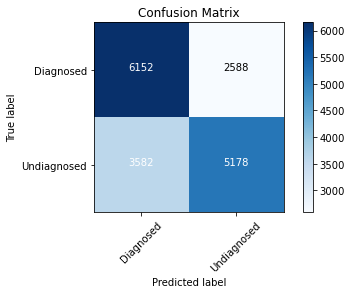

In [40]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')